In [422]:
# Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt

In [423]:
movie_genre_df = pd.read_csv('data/tmdb_genres.csv').dropna()
movie_details_df = pd.read_csv('data/movie_details.csv').dropna()
movie_df = pd.merge(movie_genre_df, movie_details_df, how="inner", on=["ID.1"])

#movie_df = movie_df[movie_df['country'].str.contains("USA")]
#movie_df = movie_df[pd.to_numeric(movie_df['usa_gross_income'], errors='coerce').notnull()]
#movie_df = movie_df[pd.to_numeric(movie_df['budget'], errors='coerce').notnull()]
movie_df["Profit"] = movie_df["Revenue"] - movie_df["Budget"]
movie_df["Year"] = movie_df['Release Date'].str.split('[-]',expand=True,regex=True)[0].astype(int)
movie_df = movie_df[(movie_df["Year"]>=2000) & (movie_df["Year"]<=2020)]
movie_df.head()

,ID_x,ID.1,Genre List,ID_y,Budget,Popularity,Release Date,Revenue,Runtime,Vote Average,Vote Count,IMDB,Profit,Year
0,0,8358,"[['Adventure', 'Drama']]",0,90000000,50.864,2000-12-22,429632142,143,7.656,10100,tt0162222,339632142,2000
1,1,4247,[['Comedy']],1,19000000,134.378,2000-07-07,278019771,88,6.324,6062,tt0175142,259019771,2000
2,2,8871,"[['Family', 'Comedy', 'Fantasy']]",2,123000000,62.037,2000-11-15,345823040,104,6.746,6479,tt0170016,222823040,2000
3,3,3981,"[['Comedy', 'Romance']]",3,70000000,31.618,2000-12-15,374111707,127,6.422,3463,tt0207201,304111707,2000
4,4,1597,"[['Comedy', 'Romance']]",4,55000000,26.050,2000-10-06,330444045,108,6.669,5306,tt0212338,275444045,2000


In [424]:
genre_df = movie_df[{ "Year", "Genre List", "Profit"}].copy()
genre_df.head()

/var/folders/n3/0fjc3g9d04gb6vgxphygsqj80000gn/T/ipykernel_27852/509926961.py:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  genre_df = movie_df[{ "Year", "Genre List", "Profit"}].copy()


,Genre List,Profit,Year
0,"[['Adventure', 'Drama']]",339632142,2000
1,[['Comedy']],259019771,2000
2,"[['Family', 'Comedy', 'Fantasy']]",222823040,2000
3,"[['Comedy', 'Romance']]",304111707,2000
4,"[['Comedy', 'Romance']]",275444045,2000


In [425]:
def find_genre_profit(df, genre):
    temp_df = df[df['Genre List'].str.contains(genre)]
    profit = temp_df.groupby("Year").agg({"Profit": "mean"})["Profit"]
    return profit.values

def find_genre_count(df, genre):
    temp_df = df[df['Genre List'].str.contains(genre)]
    count = temp_df.groupby("Year").agg({"Profit": "count"})["Profit"]
    return count.values

genres = ["Animation", "Action", "Biography", "Crime", "Adventure", "Mystery", "Music", "Fantasy", "Romance", "Family", "Thriller", "Sci-Fi", "Music", "Drama", "Horror", "Comedy", "History"]

In [426]:
genre_profit_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_profit = find_genre_profit(genre_df, genre)
    if(len(genre_profit)==21):
        genre_profit_df[f"Profit in {genre}"] = genre_profit

genre_profit_df

,year,Profit in Action,Profit in Crime,Profit in Adventure,Profit in Mystery,Profit in Fantasy,Profit in Romance,Profit in Family,Profit in Thriller,Profit in Drama,Profit in Horror,Profit in Comedy,Profit in History
0,2000,6.741593e+07,2.939877e+07,9.633091e+07,4.029024e+07,3.058966e+07,4.367954e+07,6.460358e+07,4.050943e+07,3.585179e+07,3.573752e+07,5.017491e+07,2.362036e+07
1,2001,7.587068e+07,4.236364e+07,1.464386e+08,3.728523e+07,2.069232e+08,5.399879e+07,1.406282e+08,4.879717e+07,3.683778e+07,3.676400e+07,4.575711e+07,1.397290e+08
2,2002,7.593542e+07,4.410965e+07,1.345335e+08,6.501991e+07,1.535163e+08,3.989533e+07,5.752103e+07,3.877705e+07,4.154657e+07,2.378724e+07,4.451436e+07,1.193759e+07
3,2003,1.123888e+08,3.536258e+07,1.255634e+08,4.450204e+07,1.616480e+08,3.486182e+07,1.052756e+08,6.061267e+07,2.992573e+07,3.673284e+07,5.391047e+07,6.309002e+06
4,2004,9.239157e+07,4.166726e+07,1.423206e+08,3.925979e+07,1.719570e+08,5.576067e+07,1.210900e+08,5.555081e+07,2.917907e+07,4.995231e+07,5.101470e+07,1.136804e+08
5,2005,5.855516e+07,3.742809e+07,1.202164e+08,3.276597e+07,1.195302e+08,6.579772e+07,1.196130e+08,3.890936e+07,3.818080e+07,4.343889e+07,4.814941e+07,3.958668e+07
6,2006,9.545691e+07,3.837651e+07,1.368857e+08,5.907675e+07,1.144482e+08,3.087005e+07,1.046068e+08,6.420868e+07,2.688612e+07,3.331464e+07,6.399143e+07,1.443175e+07
7,2007,1.309103e+08,3.581974e+07,2.147185e+08,1.023864e+08,1.906881e+08,4.296149e+07,1.537505e+08,5.346999e+07,3.556527e+07,4.054910e+07,6.832030e+07,3.064563e+07
8,2008,1.217914e+08,8.354307e+07,1.229518e+08,2.303073e+07,1.106124e+08,9.953599e+07,1.178769e+08,7.917855e+07,5.809360e+07,1.869463e+07,6.703399e+07,2.758506e+07
9,2009,1.679534e+08,3.131566e+07,3.345994e+08,5.906225e+07,3.127472e+08,6.458335e+07,1.449695e+08,3.883680e+07,4.030776e+07,3.821770e+07,7.120370e+07,3.322492e+07


In [427]:
genre_count_df = pd.DataFrame({"year": range(2000, 2021)})
for genre in genres:
    genre_count = find_genre_count(genre_df, genre)
    if(len(genre_count)==21):
        genre_count_df[f"Count of {genre}"] = genre_count
    
genre_count_df

,year,Count of Action,Count of Crime,Count of Adventure,Count of Mystery,Count of Fantasy,Count of Romance,Count of Family,Count of Thriller,Count of Drama,Count of Horror,Count of Comedy,Count of History
0,2000,26,26,19,14,12,22,13,44,60,14,51,3
1,2001,36,33,21,16,13,41,10,38,51,7,59,3
2,2002,38,30,29,17,13,29,17,50,73,15,64,6
3,2003,44,27,31,10,17,30,19,37,58,13,61,7
4,2004,42,20,26,13,11,40,18,33,57,12,70,4
5,2005,36,25,32,15,19,35,23,43,72,22,66,8
6,2006,33,26,27,16,18,35,26,48,82,19,68,10
7,2007,31,29,23,21,23,33,20,53,80,22,67,3
8,2008,46,26,35,13,20,37,19,42,81,16,67,8
9,2009,36,22,31,18,23,38,22,40,62,18,65,3


Text(0, 0.5, 'Profit (e8)')

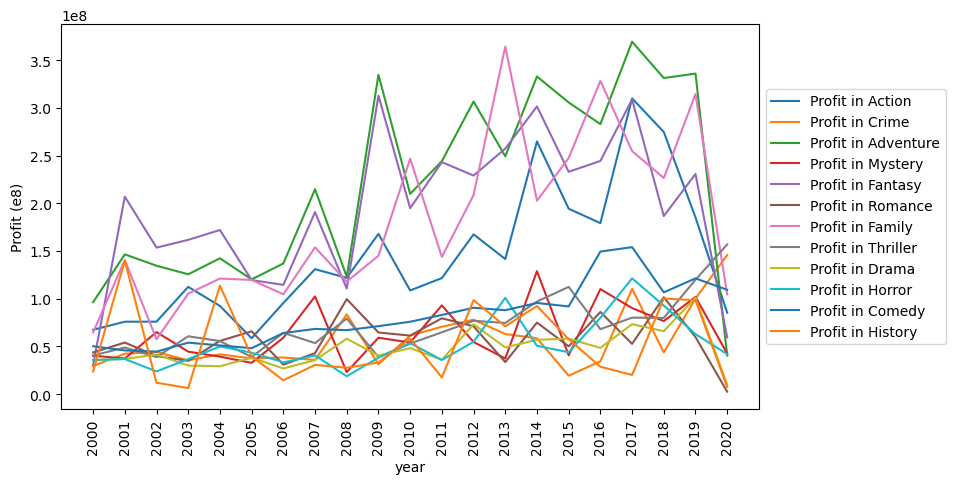

In [428]:
profit_cols = list(genre_profit_df.loc[:, genre_profit_df.columns != 'year'])
ax1 = genre_profit_df.plot.line(x="year", y=profit_cols, figsize=(9,5))
ax1.set_xticks(genre_profit_df["year"].values);
ax1.set_xticklabels(genre_profit_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Profit (e8)')

Text(0, 0.5, 'Movie Count')

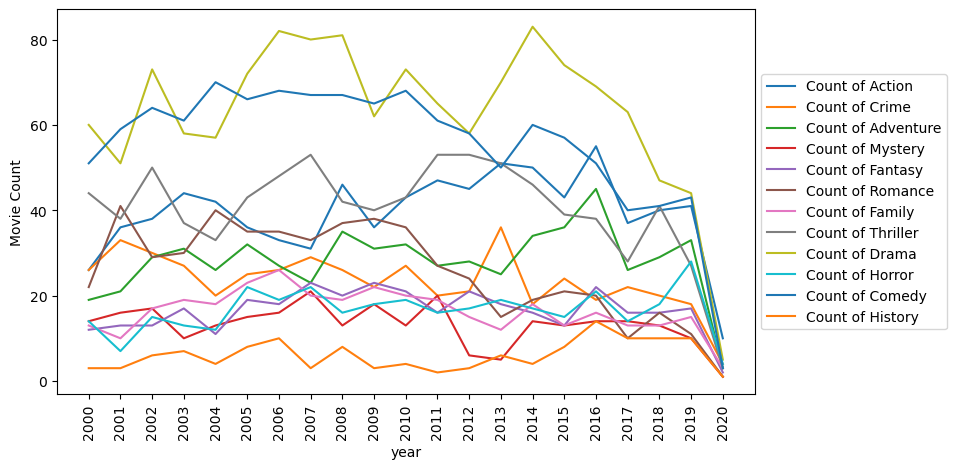

In [429]:
count_cols = list(genre_count_df.loc[:, genre_count_df.columns != 'year'])
ax1 = genre_count_df.plot.line(x="year", y=count_cols, figsize=(9,5))
ax1.set_xticks(genre_count_df["year"].values);
ax1.set_xticklabels(genre_count_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Movie Count')

In [430]:
runtime_bins = [0, 90, 120, 240]
length_labels = ["Short (<1.5hr)", "Medium (1.5-2hr)", "Long (>2hr)"]
movie_df["Length"] = pd.cut(movie_df["Runtime"], runtime_bins, labels=length_labels)
movie_df.head()

,ID_x,ID.1,Genre List,ID_y,Budget,Popularity,Release Date,Revenue,Runtime,Vote Average,Vote Count,IMDB,Profit,Year,Length
0,0,8358,"[['Adventure', 'Drama']]",0,90000000,50.864,2000-12-22,429632142,143,7.656,10100,tt0162222,339632142,2000,Long (>2hr)
1,1,4247,[['Comedy']],1,19000000,134.378,2000-07-07,278019771,88,6.324,6062,tt0175142,259019771,2000,Short (<1.5hr)
2,2,8871,"[['Family', 'Comedy', 'Fantasy']]",2,123000000,62.037,2000-11-15,345823040,104,6.746,6479,tt0170016,222823040,2000,Medium (1.5-2hr)
3,3,3981,"[['Comedy', 'Romance']]",3,70000000,31.618,2000-12-15,374111707,127,6.422,3463,tt0207201,304111707,2000,Long (>2hr)
4,4,1597,"[['Comedy', 'Romance']]",4,55000000,26.050,2000-10-06,330444045,108,6.669,5306,tt0212338,275444045,2000,Medium (1.5-2hr)


In [431]:
def find_runtime_profit(df, length):
    temp_df = df[df['Length'] == length]
    profit = temp_df.groupby("Year").agg({"Profit": "mean"})["Profit"]
    return profit.values
runtime_profit_df = pd.DataFrame({"year": range(2000, 2021)})
for length in length_labels:
    runtime_profit = find_runtime_profit(movie_df, length)
    if(len(runtime_profit)==21):
        runtime_profit_df[f"Profit in {length}"] = runtime_profit

runtime_profit_df

,year,Profit in Short (<1.5hr),Profit in Medium (1.5-2hr),Profit in Long (>2hr)
0,2000,4.868588e+07,3.071115e+07,8.694771e+07
1,2001,5.461686e+07,3.731988e+07,1.140778e+08
2,2002,5.361809e+07,3.401388e+07,1.537654e+08
3,2003,4.043370e+07,5.603680e+07,1.420707e+08
4,2004,3.815080e+07,5.370552e+07,1.255132e+08
5,2005,6.290903e+07,3.825957e+07,1.131321e+08
6,2006,3.579130e+07,4.822897e+07,1.104597e+08
7,2007,4.913599e+07,6.057121e+07,1.302947e+08
8,2008,7.182261e+07,5.758535e+07,1.431330e+08
9,2009,3.939980e+07,5.577706e+07,3.515513e+08


Text(0, 0.5, 'Profit (e8)')

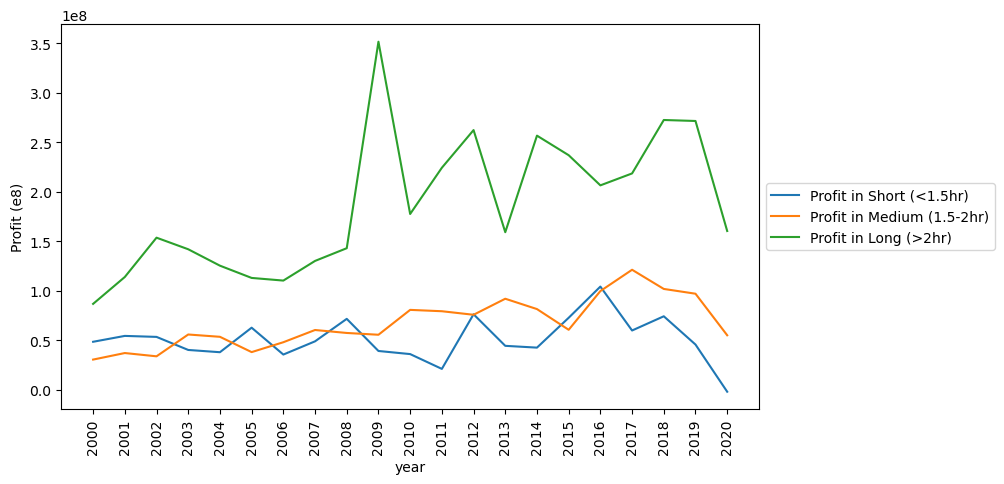

In [432]:
profit_cols = list(runtime_profit_df.loc[:, runtime_profit_df.columns != 'year'])
ax1 = runtime_profit_df.plot.line(x="year", y=profit_cols, figsize=(9,5))
ax1.set_xticks(runtime_profit_df["year"].values);
ax1.set_xticklabels(runtime_profit_df["year"].values, rotation=90)
ax1.legend(loc='center left',bbox_to_anchor=(1.0, 0.5));
ax1.set_ylabel('Profit (e8)')